LOADING LIBRARIES

In [1]:
%matplotlib inline
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
import pandas
import numpy
import warnings
import itertools
import matplotlib.pyplot as plt
import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
warnings.filterwarnings("ignore")

LOADING THE DATA

In [2]:
train = pandas.read_csv("Train_data.csv")
test = pandas.read_csv("Test_data.csv")

In [3]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
sample_size = int(len(train) * 0.1)  # Sample 20% of the dataset
# Randomly sample the dataset
train = train.sample(n=sample_size)

In [4]:
import pandas as pd
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [5]:
print(train.head())

       duration protocol_type  service flag  src_bytes  dst_bytes  land  \
15394         0           tcp  private   S0          0          0     0   
7904          0           tcp  private   S0          0          0     0   
10589         0           tcp     http   SF        215        693     0   
13097         0           tcp  private   S0          0          0     0   
5269          0           tcp  courier   S0          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
15394               0       0    0  ...                   9   
7904                0       0    0  ...                  13   
10589               0       0    0  ...                 255   
13097               0       0    0  ...                  12   
5269                0       0    0  ...                   1   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
15394                    0.04                    0.07   
7904                     0.05                    0.06   

In [7]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,2519.000000,2.519000e+03,2.519000e+03,2519.0,2519.000000,2519.0,2519.000000,2519.000000,2519.000000,2519.000000,...,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000
mean,321.768956,1.263095e+04,4.337233e+03,0.0,0.021834,0.0,0.218738,0.001191,0.398174,0.064311,...,181.921000,113.283446,0.511874,0.083077,0.144569,0.030985,0.291108,0.285431,0.117487,0.115697
std,3002.574905,1.910415e+05,1.044361e+05,0.0,0.243908,0.0,2.329020,0.044545,0.489619,2.234965,...,98.947602,110.336621,0.448497,0.185537,0.302175,0.106414,0.447727,0.448924,0.303594,0.312336
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,255.000000,57.000000,0.480000,0.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.840000e+02,4.870000e+02,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.070000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42470.000000,5.135678e+06,5.150836e+06,0.0,3.000000,0.0,30.000000,2.000000,1.000000,110.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
list(train.columns)

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'class']

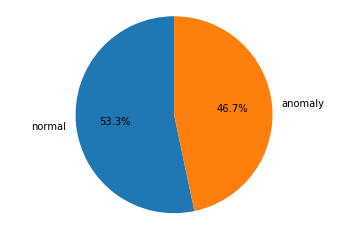

In [5]:
ratio = train['class'].value_counts()
labels = ratio.index[0], ratio.index[1]
sizes = [ratio.values[0], ratio.values[1]]

figure, axis = plt.subplots()
axis.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axis.axis('equal')

plt.show()

In [6]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [7]:
scaler = StandardScaler()
# select only numerical columns for scaling
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
num_cols




Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [8]:
# create a StandardScaler object
scaler = StandardScaler()
# fit the scaler on the selected columns and transform the data
train[num_cols] = scaler.fit_transform(train[num_cols])

In [15]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
15394,-0.113466,tcp,private,S0,-0.021393,-0.041077,-0.019928,-0.05988,0.0,-0.093714,...,-0.969018,-1.093083,-0.077583,-0.470887,-0.280759,1.623224,1.635323,-0.372440,-0.363769,0
7904,-0.113466,tcp,private,S0,-0.021393,-0.041077,-0.019928,-0.05988,0.0,-0.093714,...,-0.933147,-1.070893,-0.129040,-0.470887,-0.280759,1.623224,1.635323,-0.372440,-0.363769,0
10589,-0.113466,tcp,http,SF,-0.021364,-0.036312,-0.019928,-0.05988,0.0,-0.093714,...,1.237087,1.037077,-0.437780,-0.406514,-0.030086,-0.633344,-0.619622,-0.035572,-0.266789,1
13097,-0.113466,tcp,private,S0,-0.021393,-0.041077,-0.019928,-0.05988,0.0,-0.093714,...,-0.942115,-1.070893,-0.129040,-0.470887,-0.280759,1.623224,1.635323,-0.372440,-0.363769,0
5269,-0.113466,tcp,courier,S0,-0.021393,-0.041077,-0.019928,-0.05988,0.0,-0.093714,...,-1.040762,-1.181839,-0.180497,-0.470887,-0.280759,1.623224,1.635323,-0.372440,-0.363769,0


In [16]:
# check for null values
print(train.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder on the "class" column
encoder.fit(train['class'])

# Transform the "Label" column to its encoded representation
train['class'] = encoder.transform(train['class'])

In [10]:
train_x=train.drop('class',axis=1)
train_y=train['class']

In [19]:
train_x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
15394,-0.113466,tcp,private,S0,-0.021393,-0.041077,-0.019928,-0.05988,0.0,-0.093714,...,0.727444,-0.969018,-1.093083,-0.077583,-0.470887,-0.280759,1.623224,1.635323,-0.372440,-0.363769
7904,-0.113466,tcp,private,S0,-0.021393,-0.041077,-0.019928,-0.05988,0.0,-0.093714,...,0.727444,-0.933147,-1.070893,-0.129040,-0.470887,-0.280759,1.623224,1.635323,-0.372440,-0.363769
10589,-0.113466,tcp,http,SF,-0.021364,-0.036312,-0.019928,-0.05988,0.0,-0.093714,...,-1.429250,1.237087,1.037077,-0.437780,-0.406514,-0.030086,-0.633344,-0.619622,-0.035572,-0.266789
13097,-0.113466,tcp,private,S0,-0.021393,-0.041077,-0.019928,-0.05988,0.0,-0.093714,...,0.727444,-0.942115,-1.070893,-0.129040,-0.470887,-0.280759,1.623224,1.635323,-0.372440,-0.363769
5269,-0.113466,tcp,courier,S0,-0.021393,-0.041077,-0.019928,-0.05988,0.0,-0.093714,...,0.727444,-1.040762,-1.181839,-0.180497,-0.470887,-0.280759,1.623224,1.635323,-0.372440,-0.363769


In [20]:
train_y.head()

15394    0
7904     0
10589    1
13097    0
5269     0
Name: class, dtype: int64

In [21]:
train_x.shape

(2519, 40)

In [22]:
train_x.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [11]:
train_x=train_x.drop('protocol_type',axis=1)
train_x=train_x.drop('service',axis=1)
train_x=train_x.drop('flag',axis=1)

In [12]:
train_y = np.array(train_y) 

Random Forest

In [13]:
trainX, testX, trainY, testY = train_test_split(train_x,train_y,test_size=0.4, random_state=1)

In [28]:
trainX.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
8546,-0.113466,-0.021392,-0.041077,-0.019928,-0.05988,0.0,-0.093714,-0.028189,-0.812720,-0.031452,...,-1.834263,-0.655141,1.037077,-0.437780,2.747751,4.064242,-0.633344,-0.619622,-0.372440,-0.363769
3664,-0.113466,-0.021372,-0.027598,-0.019928,-0.05988,0.0,-0.093714,-0.028189,1.230436,-0.031452,...,-1.682383,1.237087,1.037077,-0.437780,-0.277769,0.053472,-0.633344,-0.619622,-0.372440,-0.363769
16604,-0.113466,-0.021343,-0.036318,-0.019928,-0.05988,0.0,-0.093714,-0.028189,1.230436,-0.031452,...,-0.578723,1.237087,1.037077,-0.437780,-0.438701,-0.197202,-0.633344,-0.619622,-0.372440,-0.363769
18182,-0.113466,-0.021387,-0.040789,-0.019928,-0.05988,0.0,-0.093714,-0.028189,-0.812720,-0.031452,...,-0.943235,-0.251586,1.014888,-0.334867,-0.438701,-0.280759,-0.633344,-0.619622,-0.372440,-0.363769
21922,-0.113466,-0.021393,-0.041077,-0.019928,-0.05988,0.0,-0.093714,-0.028189,-0.812720,-0.031452,...,0.727444,-0.924179,-1.070893,-0.077583,-0.470887,-0.280759,-0.633344,-0.619622,2.996238,2.868908


Random Forest

In [32]:
rfc = RandomForestClassifier();
rfc.fit(trainX, trainY);
rfc.score(testX,testY)

0.9861111111111112


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.99      0.98       460
        Good       0.99      0.98      0.99       548

    accuracy                           0.99      1008
   macro avg       0.99      0.99      0.99      1008
weighted avg       0.99      0.99      0.99      1008


CONFUSION MATRIX


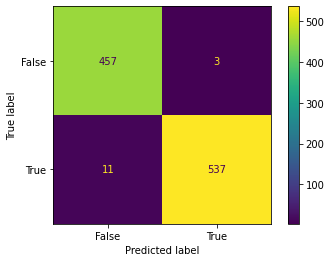

In [34]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(rfc.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(rfc.predict(testX), testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

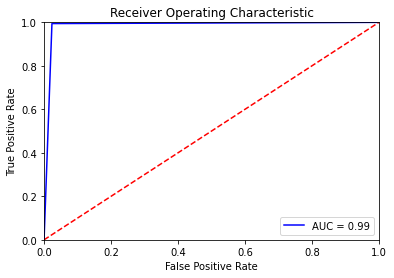

In [35]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,rfc.predict(testX))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logisitic Regression

In [36]:
lr = LogisticRegression()
lr.fit(trainX,trainY)
lr.score(testX,testY)


0.9424603174603174


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.95      0.94       452
        Good       0.96      0.93      0.95       556

    accuracy                           0.94      1008
   macro avg       0.94      0.94      0.94      1008
weighted avg       0.94      0.94      0.94      1008


CONFUSION MATRIX


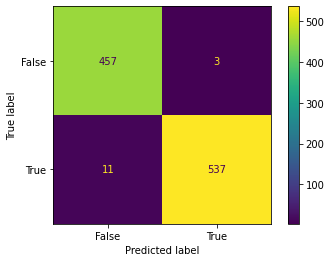

In [48]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(rfc.predict(testX), testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

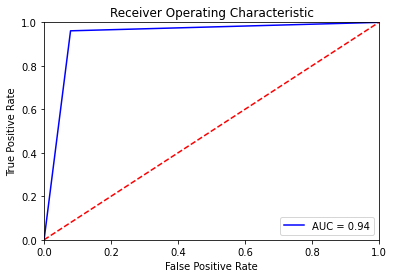

In [49]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,lr.predict(testX))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision TREE

In [39]:
dt = DecisionTreeClassifier()
dt.fit(trainX,trainY)
dt.score(testX,testY)

0.9801587301587301


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      0.99      0.98       456
        Good       0.99      0.97      0.98       552

    accuracy                           0.98      1008
   macro avg       0.98      0.98      0.98      1008
weighted avg       0.98      0.98      0.98      1008


CONFUSION MATRIX


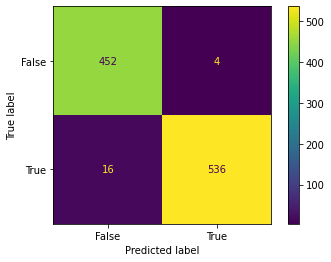

In [50]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(dt.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(dt.predict(testX), testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

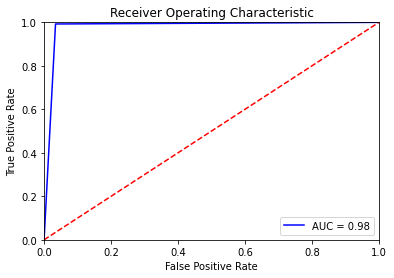

In [51]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,dt.predict(testX))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVM MODEL


In [42]:
# Train a support vector machine model
svc = SVC()
svc.fit(trainX,trainY)
svc.score(testX,testY)

0.9613095238095238


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.99      0.96       439
        Good       0.99      0.94      0.96       569

    accuracy                           0.96      1008
   macro avg       0.96      0.96      0.96      1008
weighted avg       0.96      0.96      0.96      1008


CONFUSION MATRIX


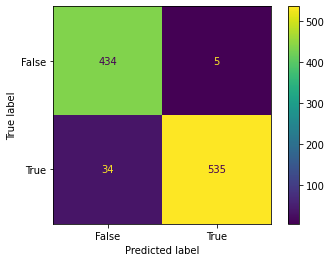

In [52]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(svc.predict(testX), testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(svc.predict(testX), testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

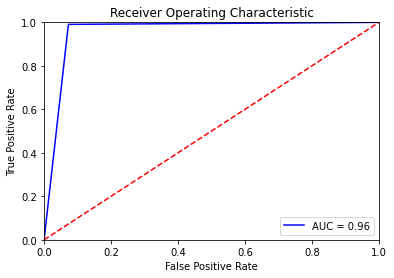

In [53]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,svc.predict(testX))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBOOST

In [45]:
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=50,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
model.fit(trainX,trainY)
model.score(testX,testY)

0.9400025085781739

In [55]:
predicted=model.predict(testX)
for x in range(len(predicted)):
        if(predicted[x]<0.5):
                predicted[x]=0;
        else:
               predicted[x]=1
        
print(predicted)

[1. 1. 0. ... 0. 0. 0.]



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      0.99      0.98       456
        Good       0.99      0.97      0.98       552

    accuracy                           0.98      1008
   macro avg       0.98      0.98      0.98      1008
weighted avg       0.98      0.98      0.98      1008


CONFUSION MATRIX


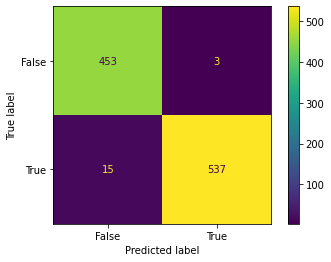

In [56]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(predicted, testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(predicted, testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

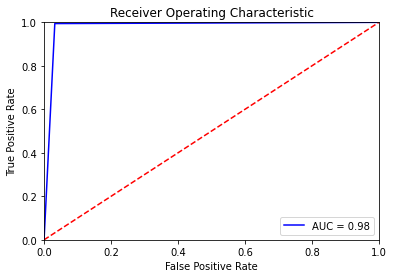

In [57]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,predicted)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

LIGHTGBM


In [20]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(trainX.astype('float32'),trainY.astype('float32')) 
accuracy = model.score(testX.astype('float32'),testY.astype('float32'))
print(accuracy)

0.9910714285714286



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      1.00      0.98       456
        Good       1.00      0.98      0.99       552

    accuracy                           0.99      1008
   macro avg       0.99      0.99      0.99      1008
weighted avg       0.99      0.99      0.99      1008


CONFUSION MATRIX


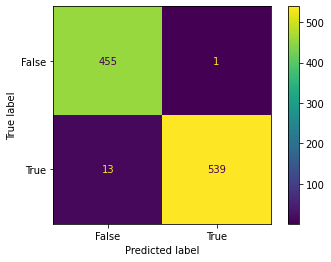

In [59]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(model.predict(testX.astype('float32')), testY.astype('float32'),
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(model.predict(testX.astype('float32')), testY.astype('float32'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

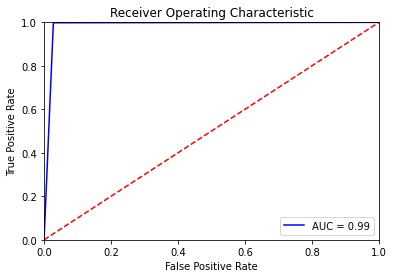

In [60]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY.astype('float32'),model.predict(testX.astype('float32')))
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Catboost

In [36]:
from catboost import CatBoostClassifier
# Initialize the CatBoost classifier
clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')
# Fit the classifier on the training data
clf.fit(trainX,trainY, verbose=False)
# Make predictions on the test set
y_pred = clf.predict(testX)
# Evaluate the accuracy of the predictions
accuracy = accuracy_score(testY, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9920634920634921



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      0.99      0.99       457
        Good       0.99      0.99      0.99       551

    accuracy                           0.99      1008
   macro avg       0.99      0.99      0.99      1008
weighted avg       0.99      0.99      0.99      1008


CONFUSION MATRIX


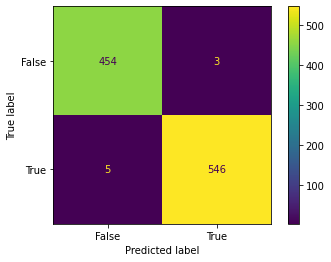

In [37]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred, testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(y_pred, testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

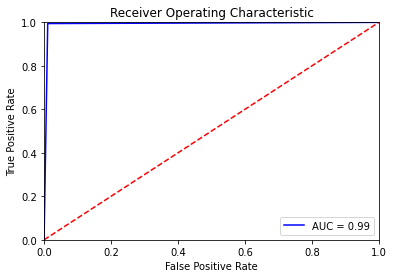

In [38]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,y_pred)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoost classifier with decision trees as base estimators
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# Train the classifier
clf.fit(trainX, trainY)
# Make predictions on the test set
y_pred = clf.predict(testX)
# Evaluate the classifier
accuracy = accuracy_score(testY, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9871031746031746



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      0.98      0.99       460
        Good       0.99      0.99      0.99       548

    accuracy                           0.99      1008
   macro avg       0.99      0.99      0.99      1008
weighted avg       0.99      0.99      0.99      1008


CONFUSION MATRIX


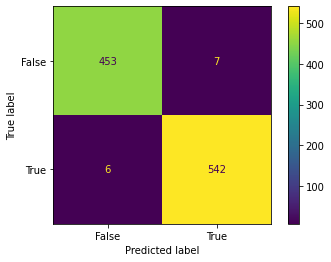

In [15]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred, testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(y_pred, testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

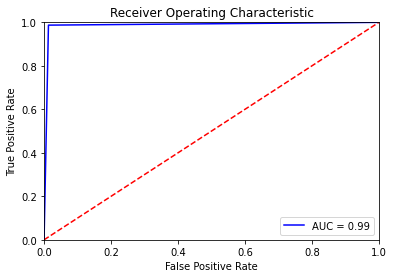

In [16]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,y_pred)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Our own algorithm based on existing algorithm

In [34]:
class MyClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.dt_clf = DecisionTreeClassifier()
        self.svm_clf = SVC()

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # Train the decision tree classifier
        self.dt_clf.fit(X, y)

        # Generate new features using the decision tree classifier
        X_new = self.dt_clf.apply(X)
        X_new = np.reshape(X_new, (-1, 1))

        # Train the SVM on the new feature set
        self.svm_clf.fit(X_new, y)

        return self


In [35]:
def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

        # Generate new features using the decision tree classifier
        X_new = self.dt_clf.apply(X)
        X_new = np.reshape(X_new, (-1, 1))

        # Make predictions using the SVM
        y_pred = self.svm_clf.predict(X_new)

        return y_pred

In [31]:
clf = MyClassifier()
clf.fit(trainX.toarray(),trainY)
y_pred = clf.predict(testX)
accuracy = accuracy_score(testY, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9404761904761905



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.94      0.93       455
        Good       0.95      0.94      0.95       553

    accuracy                           0.94      1008
   macro avg       0.94      0.94      0.94      1008
weighted avg       0.94      0.94      0.94      1008


CONFUSION MATRIX


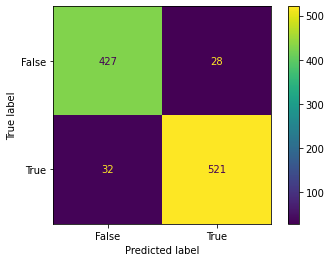

In [32]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred, testY,
                            target_names =['Bad','Good']))
print('\nCONFUSION MATRIX')
confusion_matrix = metrics.confusion_matrix(y_pred, testY)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


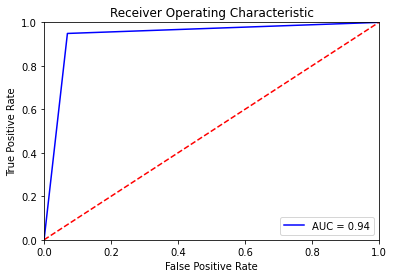

In [33]:
from sklearn.metrics import roc_curve, auc
# Generate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(testY,y_pred)
# Compute AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

By using the decision tree to generate new features that capture non-linear relationships between features and target variable, we can enhance the SVM's ability to accurately classify instances. The decision tree acts as a feature extractor that transforms the input data into a new feature space, which can then be used by the SVM to learn a decision boundary that separates the classes. This way, we can benefit from the strengths of both algorithms and improve the overall accuracy of the model.